# Problem statement
BigMart, a retail company, has gathered sales data for 1559 products across 10 stores located in different cities during the year 2013. The company is interested in building a predictive model to forecast the sales of each product in a particular store. By leveraging this model, BigMart aims to gain insights into the key factors influencing sales and optimize its strategies to increase overall sales.

However, the dataset presents challenges, such as missing values, which need to be addressed. The primary goal is to create a structured and effective data science solution that can accurately predict product sales based on various attributes related to both products and stores.

#Hypothesis Generation

Store Size Hypothesis:
Larger stores are likely to exhibit higher sales.

Product Demand Hypothesis:
Products with higher historical demand will have higher sales.

Store Location Hypothesis:
Stores in urban areas will likely experience higher sales.

Promotion Impact Hypothesis:
Products included in special promotions will see a temporary increase in sales.

Seasonal Variation Hypothesis:
Sales of certain products will show variations based on the seasons.

In [3]:
import zipfile
import os

# Replace 'your_zip_file.zip' with the actual name of your zip file
zip_file_path = '/content/9961_14084_bundle_archive.zip'
extracted_folder = 'extracted_data/'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

## Loading Packages and Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
extracted_files = os.listdir(extracted_folder)
print(extracted_files)

['Train.csv', 'Test.csv']


In [7]:
# Load the training dataset
Train_df = pd.read_csv(os.path.join(extracted_folder, 'Train.csv'))
# Load the testing dataset
Test_df = pd.read_csv(os.path.join(extracted_folder, 'Test.csv'))

## Data Structure and Content

In [8]:
# Display basic info about the training dataset
print(Train_df.info())
print(Train_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
Item_Identifier                 0
Item_W

In [9]:
print(Train_df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [10]:
print(Train_df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [11]:
y = Train_df['Item_Outlet_Sales']

In [12]:
# Display basic info about the testing dataset
print(Test_df.info())
print(Test_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content            

In [13]:
print(Test_df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

In [14]:
# Handling duplicate values
print("Unique values in 'Item_Fat_Content' in training data before handling duplicates:", Train_df['Item_Fat_Content'].unique())
fat_content_mapping = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
Train_df['Item_Fat_Content'] = Train_df['Item_Fat_Content'].replace(fat_content_mapping)
print("Unique values in 'Item_Fat_Content' in training data after handling duplicates:", Train_df['Item_Fat_Content'].unique())
print("Unique values in 'Item_Fat_Content' in testing data before handling duplicates:", Test_df['Item_Fat_Content'].unique())
Test_df['Item_Fat_Content'] = Test_df['Item_Fat_Content'].replace(fat_content_mapping)

# Display unique values in 'Item_Fat_Content' after handling duplicates in testing data
print("Unique values in 'Item_Fat_Content' in testing data after handling duplicates:", Test_df['Item_Fat_Content'].unique())


Unique values in 'Item_Fat_Content' in training data before handling duplicates: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Unique values in 'Item_Fat_Content' in training data after handling duplicates: ['Low Fat' 'Regular']
Unique values in 'Item_Fat_Content' in testing data before handling duplicates: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Unique values in 'Item_Fat_Content' in testing data after handling duplicates: ['Low Fat' 'Regular']


## Exploratory Data Analysis(EDA)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
  Item_Identifier  Item_Weight Item_Fat_Conte

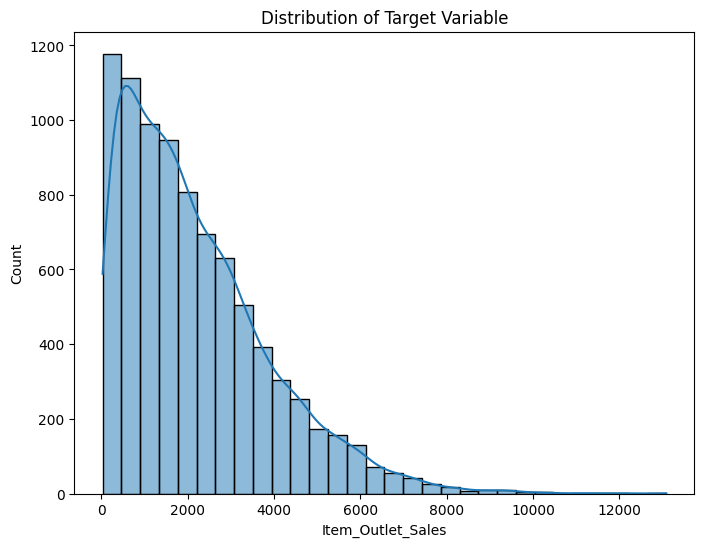

In [15]:
# Explore the data for training data
print(Train_df.describe())  # Summary statistics
print(Train_df.head())      # Display the first few rows of the dataset

# Analyze the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(Train_df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

<ipython-input-16-713dfddf4a5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Train_df.corr()


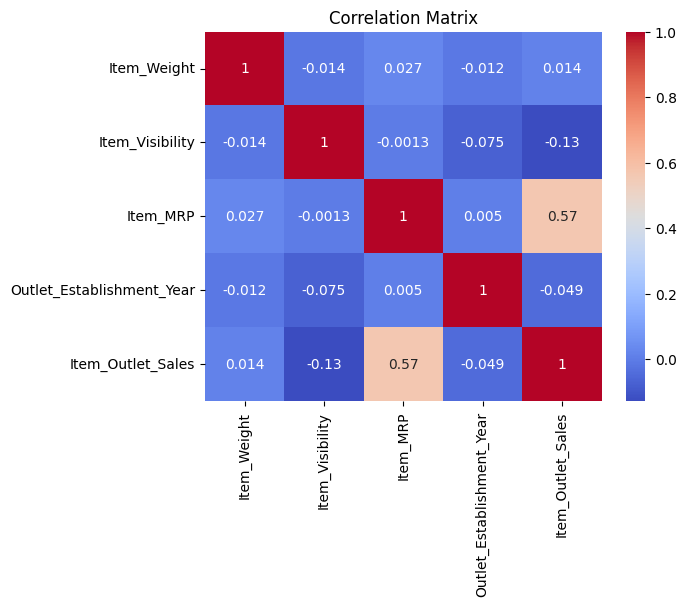

In [16]:
# Explore correlations between features
correlation_matrix = Train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
print(Test_df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000


In [19]:
# Display the first few rows of the testing dataset
print(Test_df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300          Regular         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

<ipython-input-20-daa724d59620>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_test = Test_df.corr()


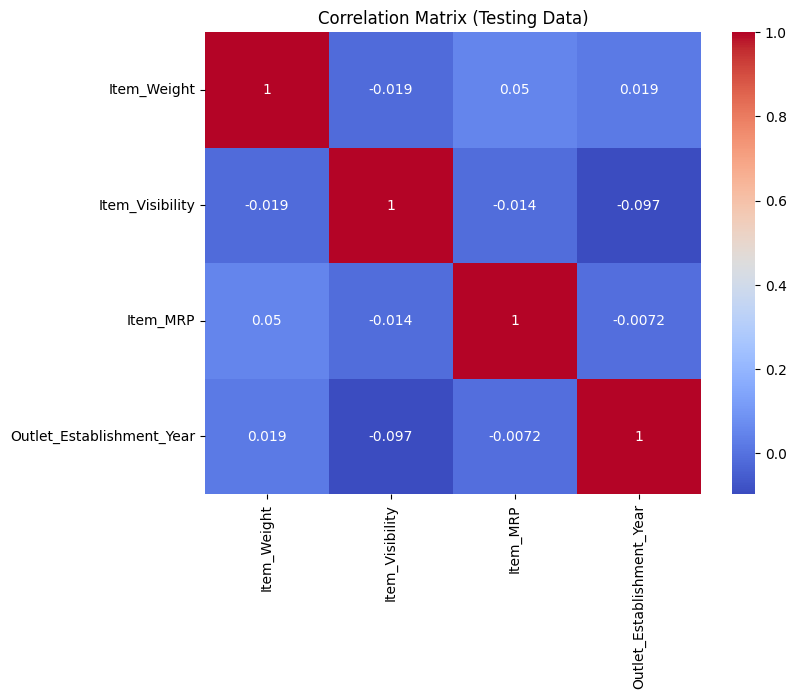

In [20]:
# Explore correlations between features in the testing dataset
correlation_matrix_test = Test_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_test, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Testing Data)')
plt.show()

## Univeriate Analysis

In [21]:
print(Train_df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [22]:
print(Train_df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

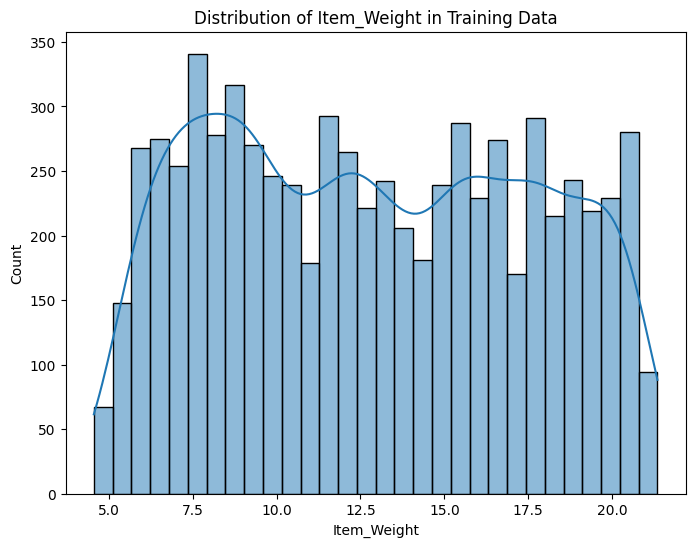

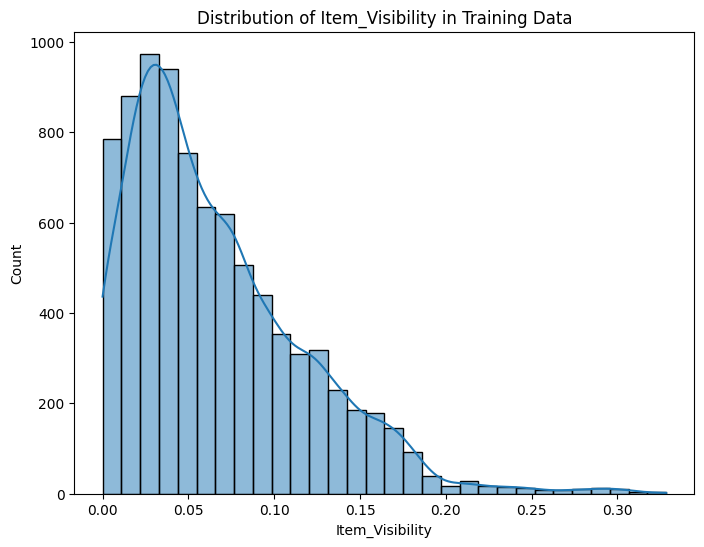

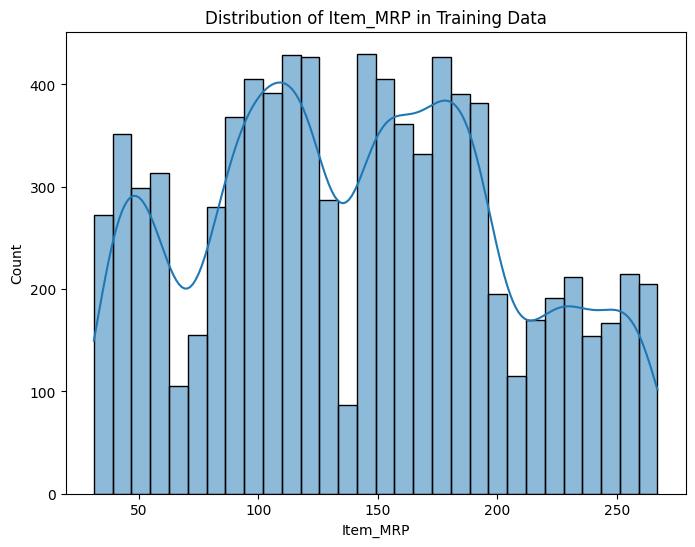

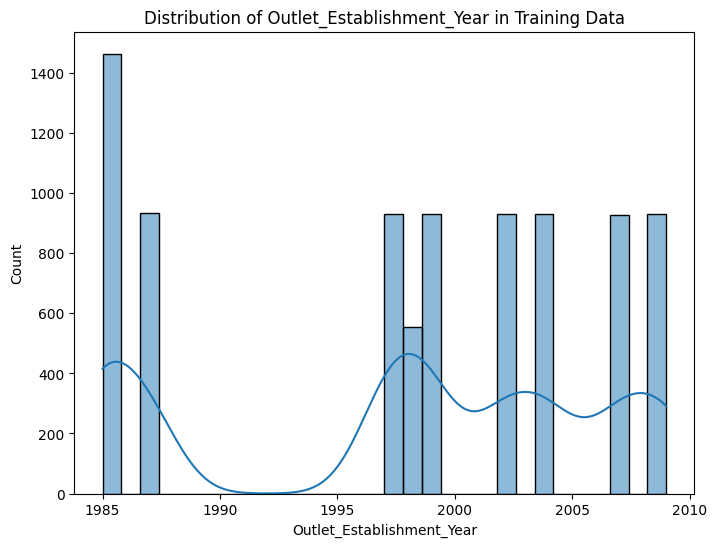

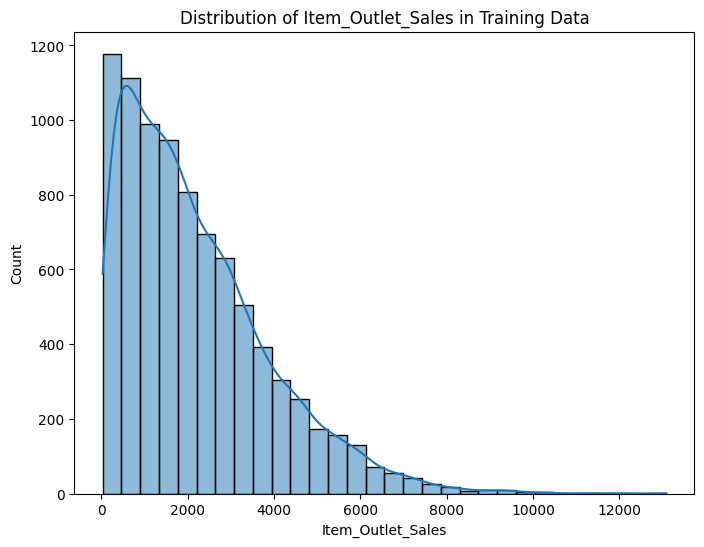

In [23]:
# Univariate analysis for numerical features
numerical_features = Train_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(Train_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} in Training Data')
    plt.show()

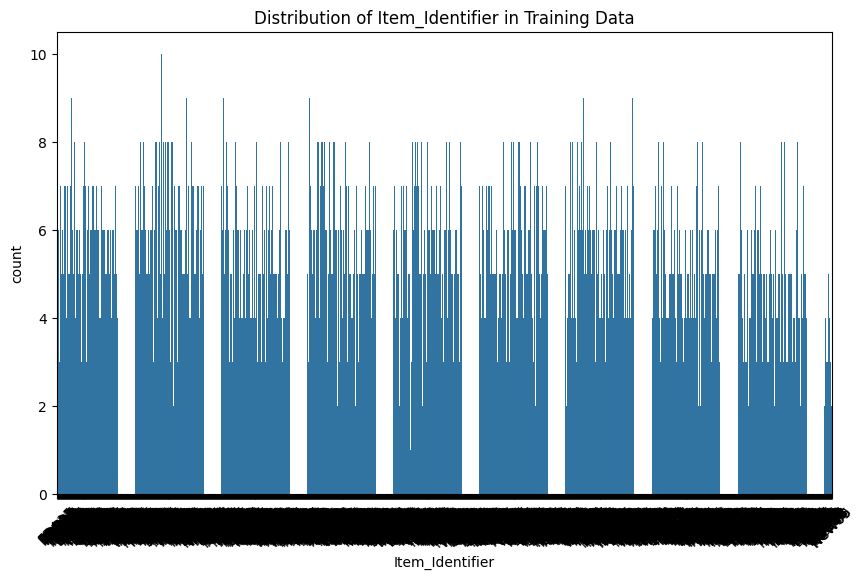

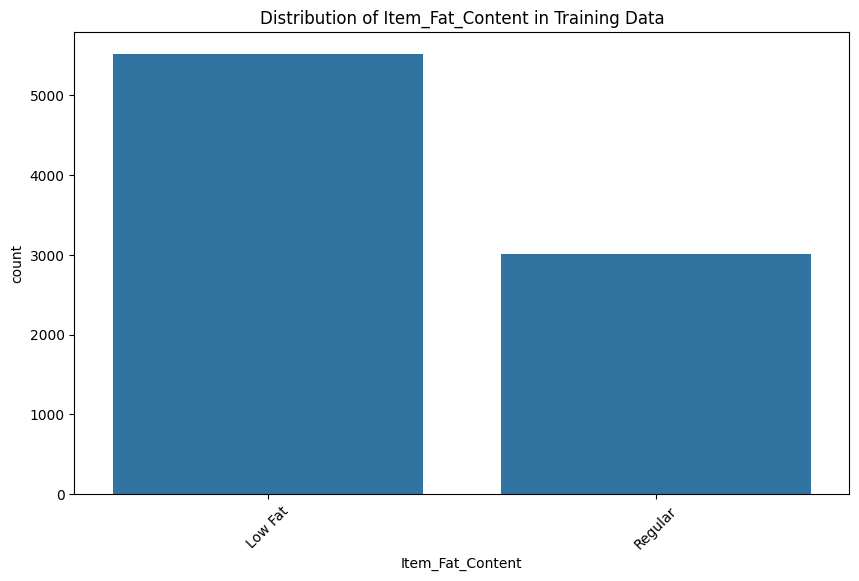

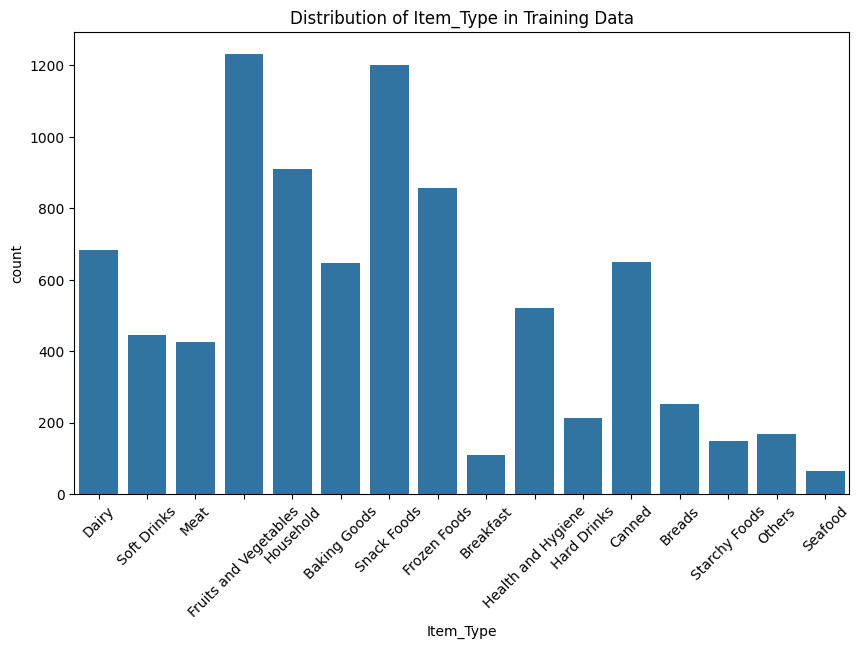

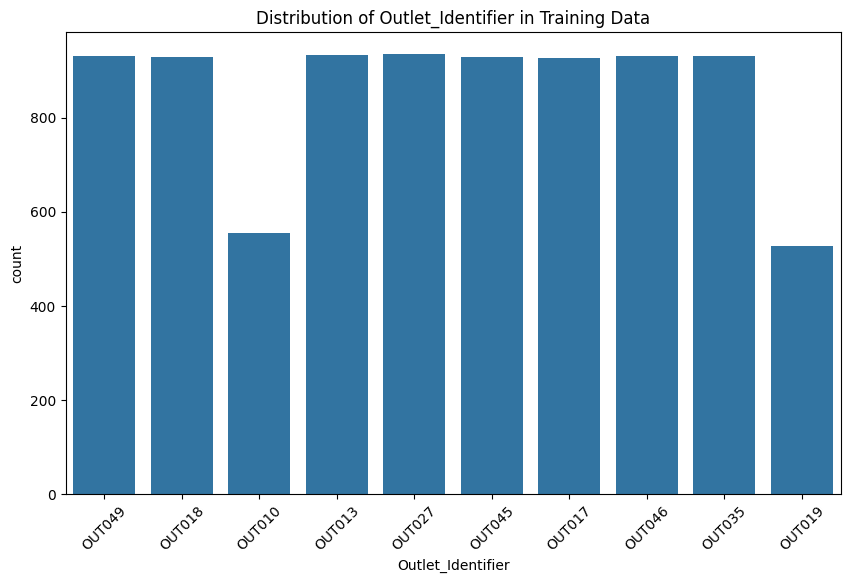

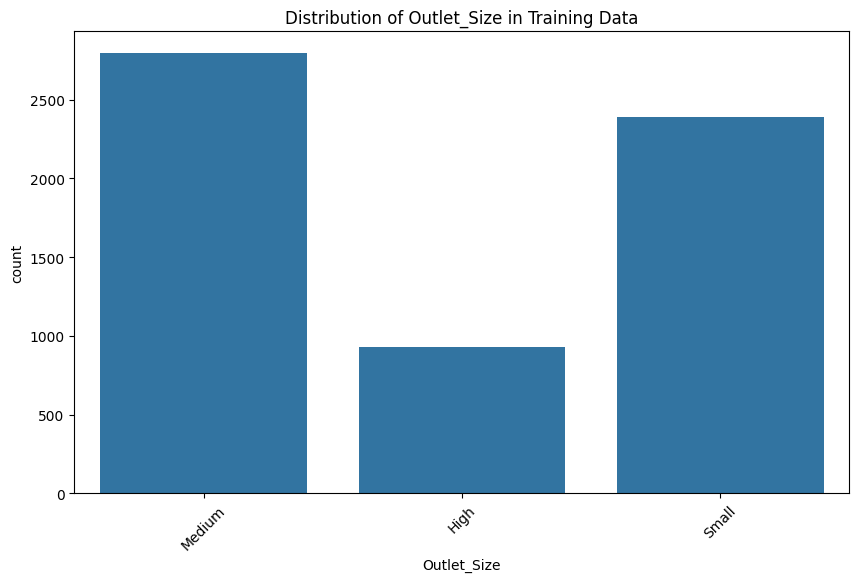

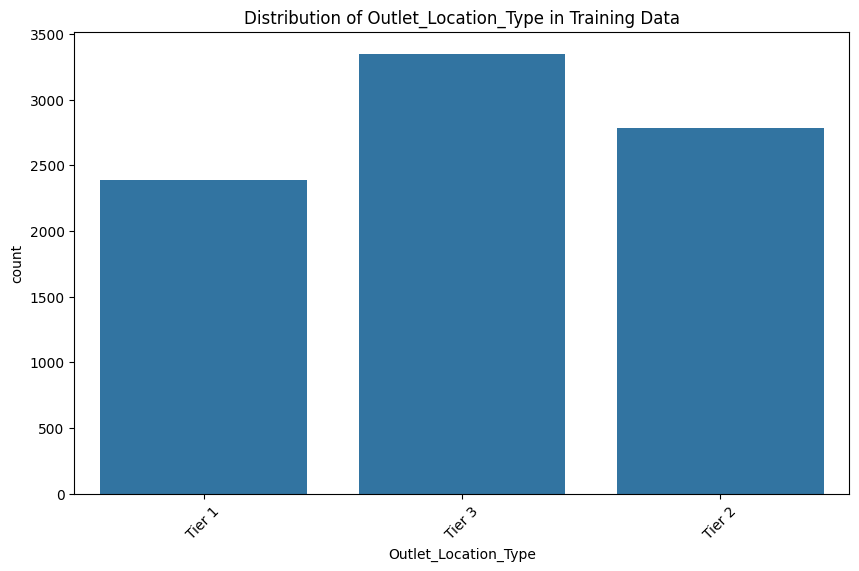

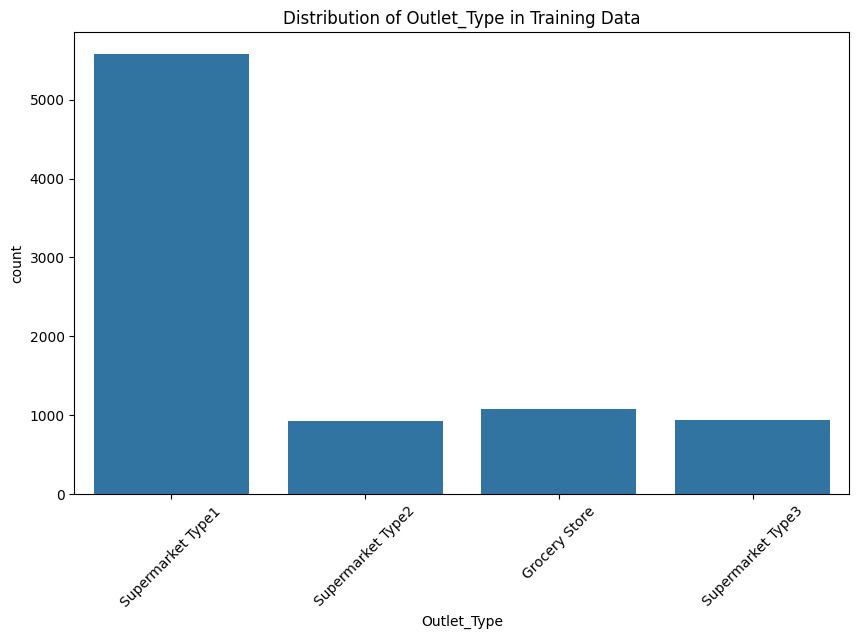

In [25]:
# Univariate analysis for categorical features
categorical_features = Train_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=Train_df)
    plt.title(f'Distribution of {feature} in Training Data')
    plt.xticks(rotation=45)
    plt.show()

In [29]:
# Univeriate analysis for testing data
import matplotlib.pyplot as plt
import seaborn as sn
print(Test_df.describe())
print(Test_df.head())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300          Regular         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Ot

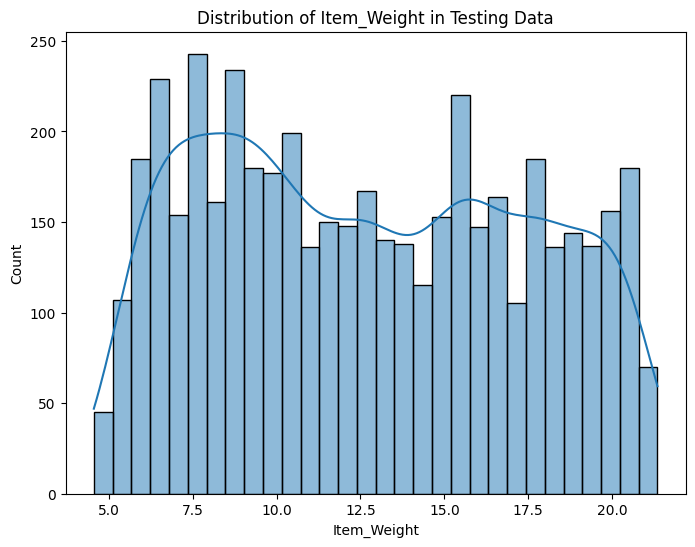

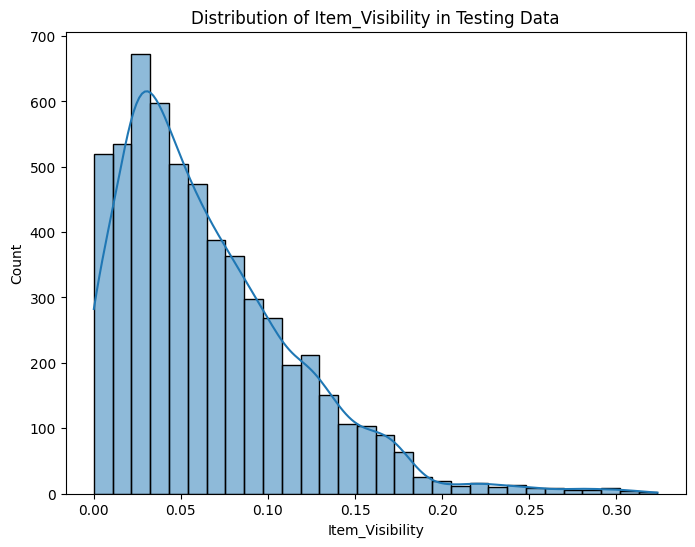

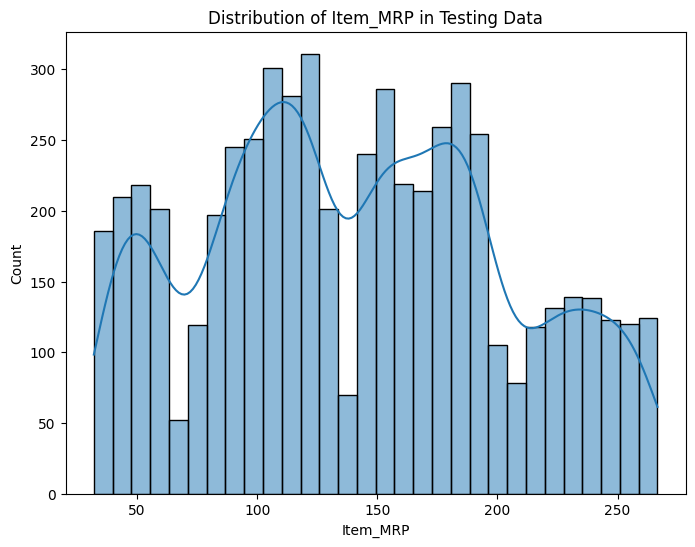

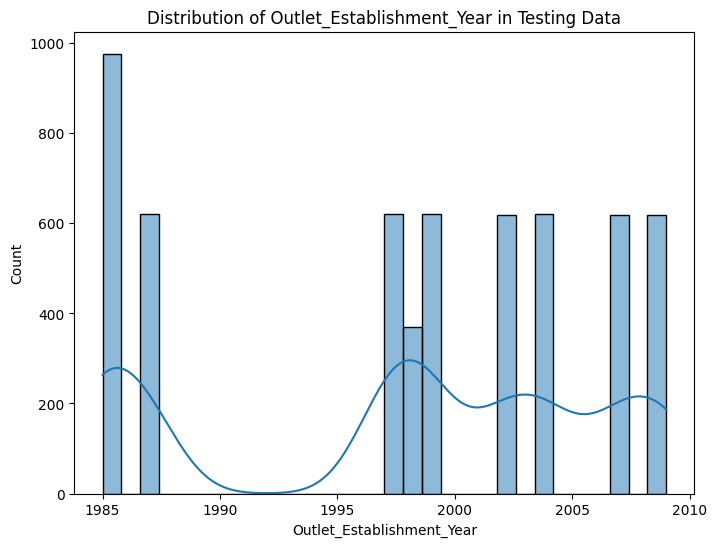

In [31]:
# Univariate analysis for numerical features
numerical_features = Test_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(Test_df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} in Testing Data')
    plt.show()

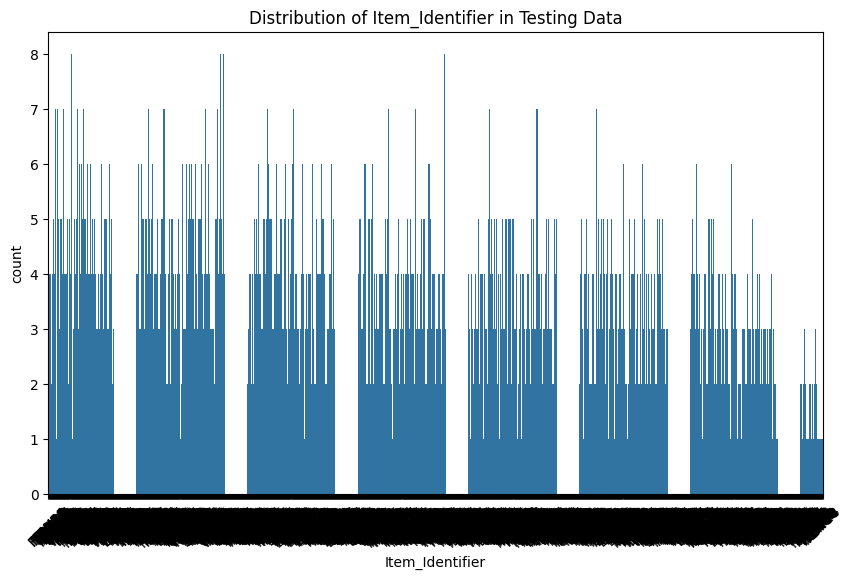

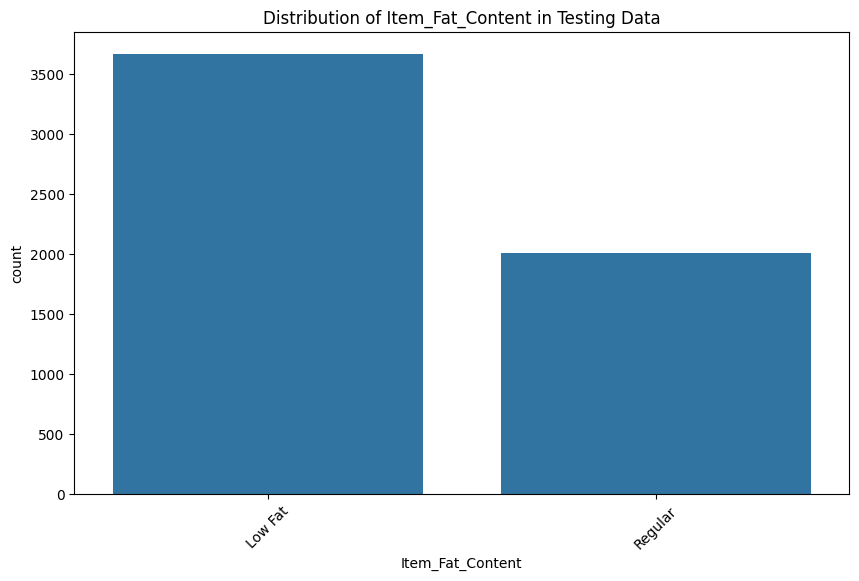

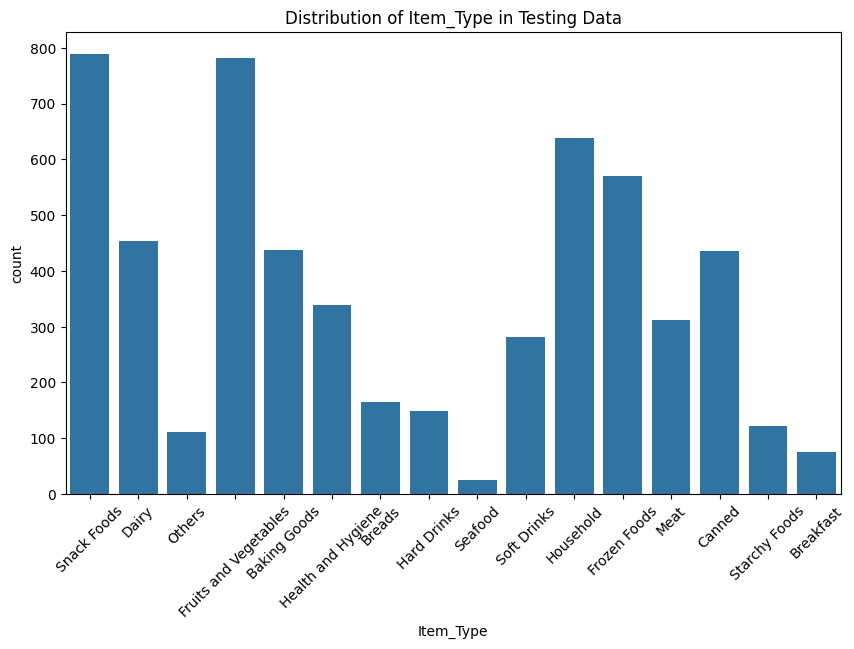

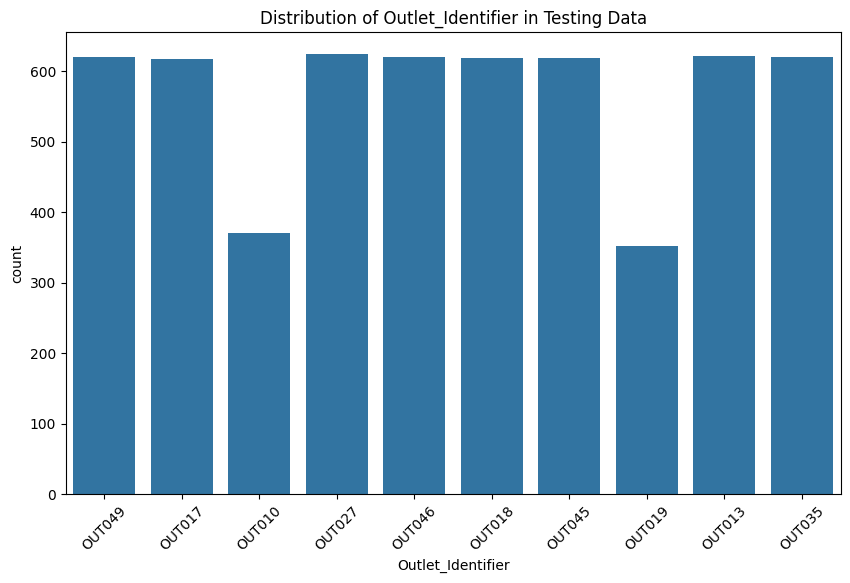

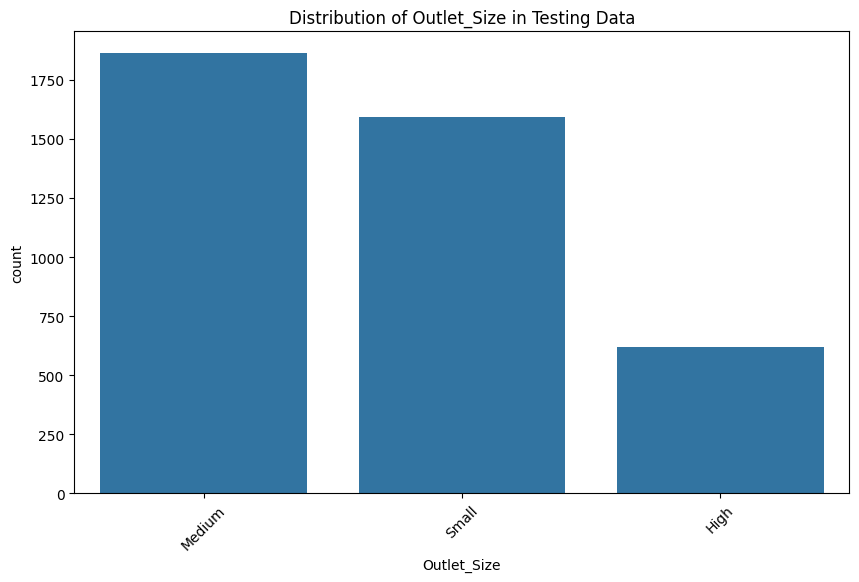

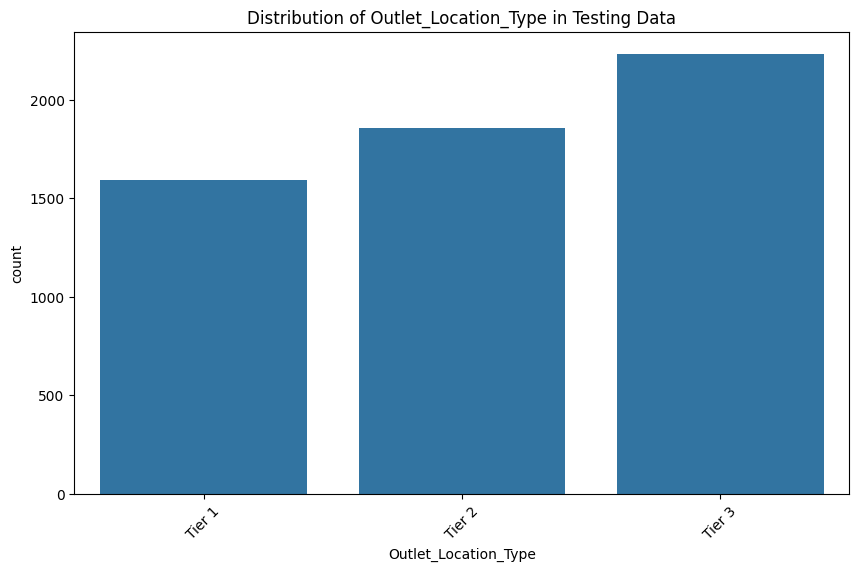

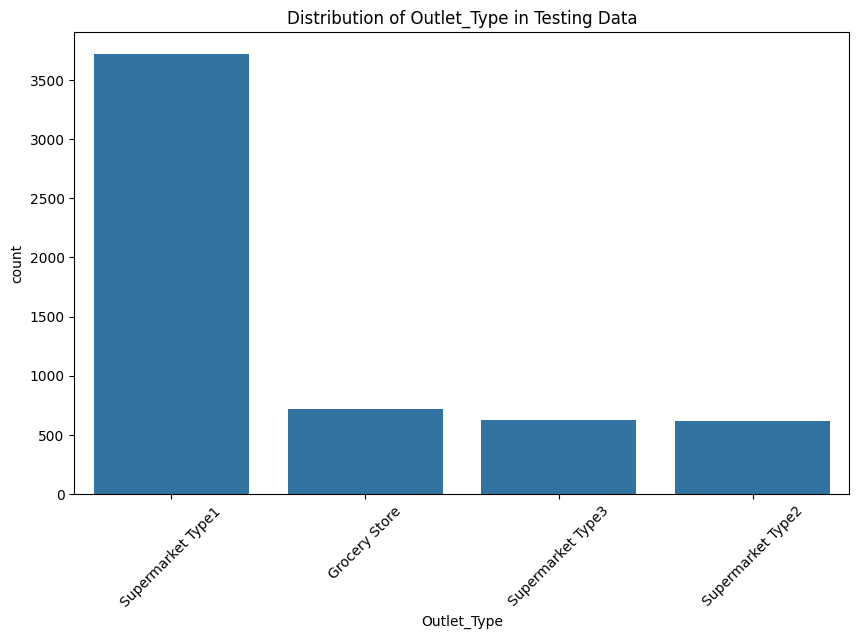

In [32]:
# Univariate analysis for categorical features
categorical_features = Test_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=Test_df)
    plt.title(f'Distribution of {feature} in Testing Data')
    plt.xticks(rotation=45)
    plt.show()


## Bivariate analysis

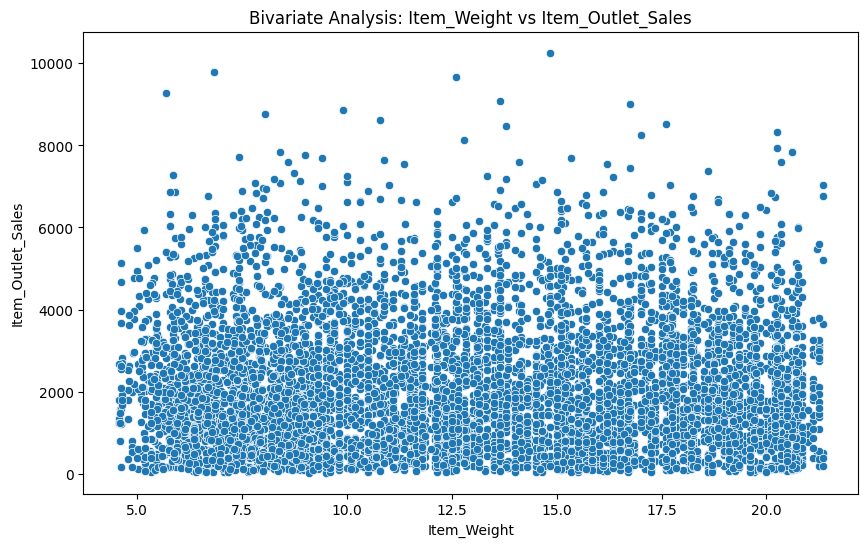

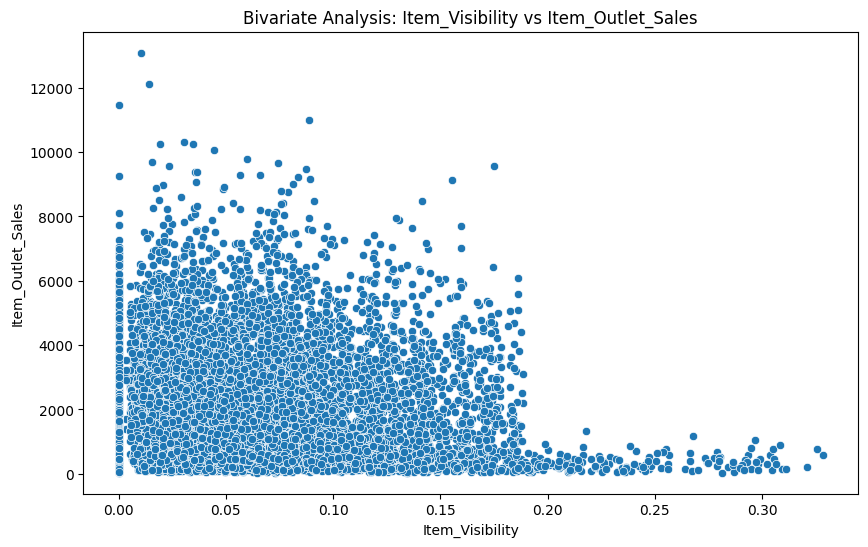

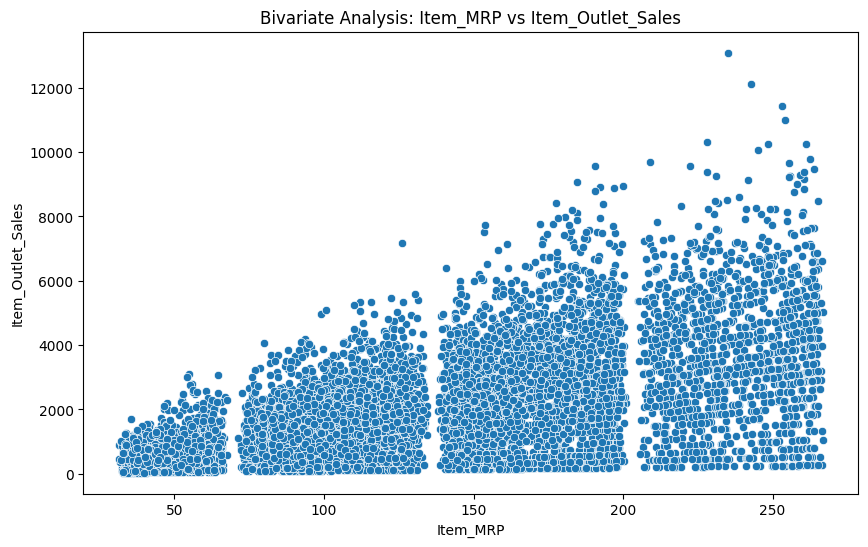

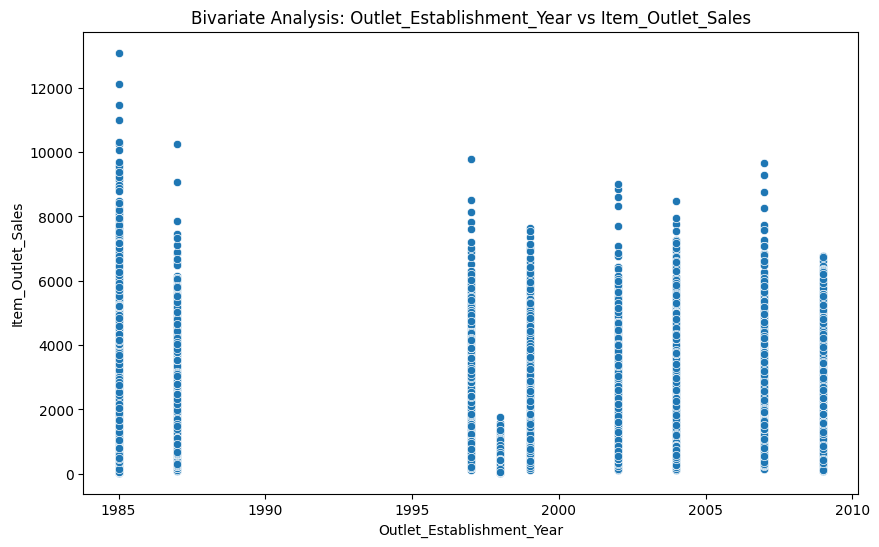

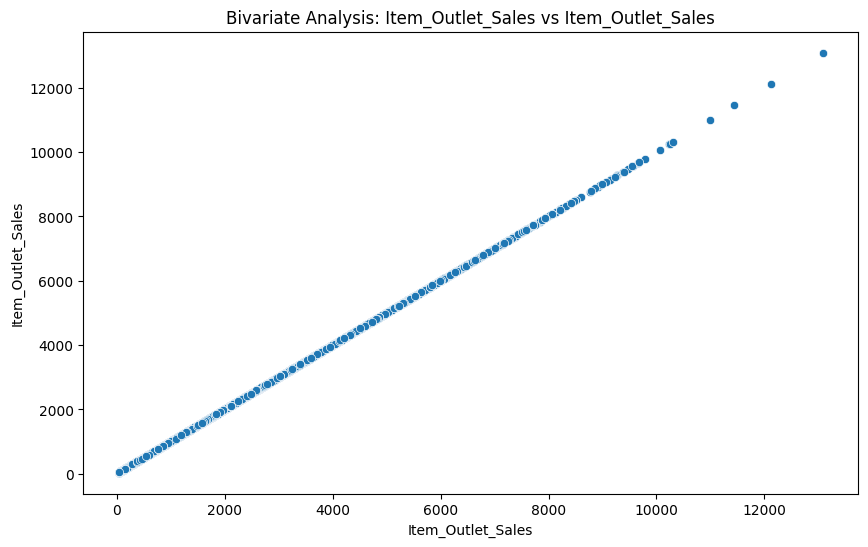

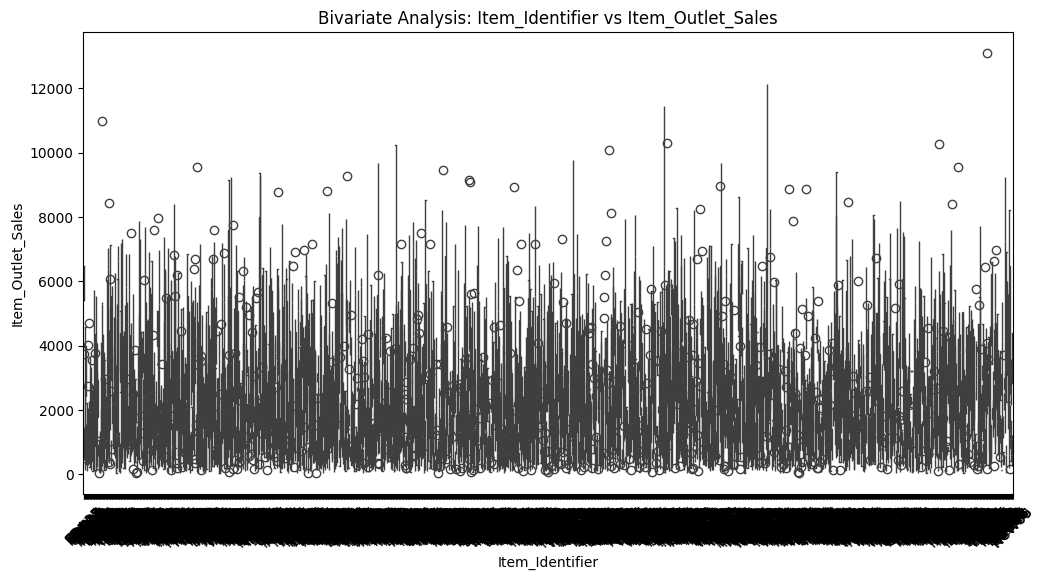

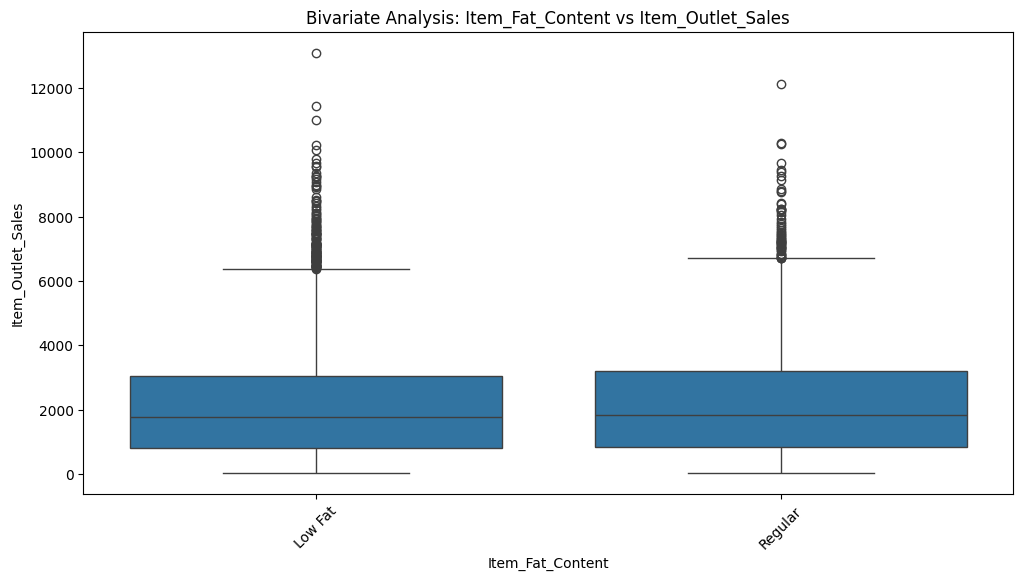

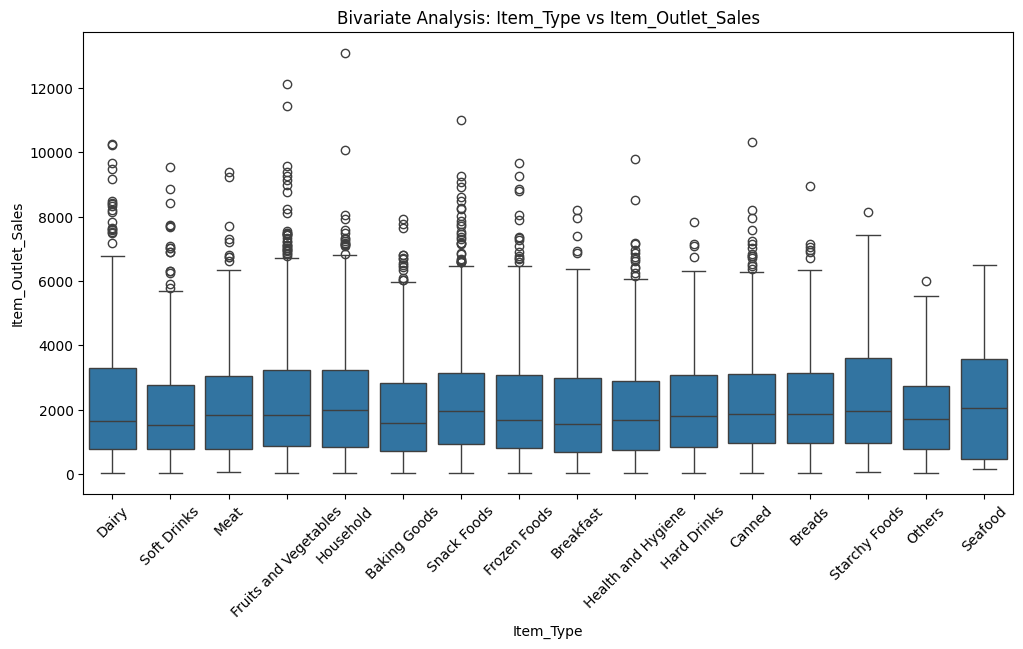

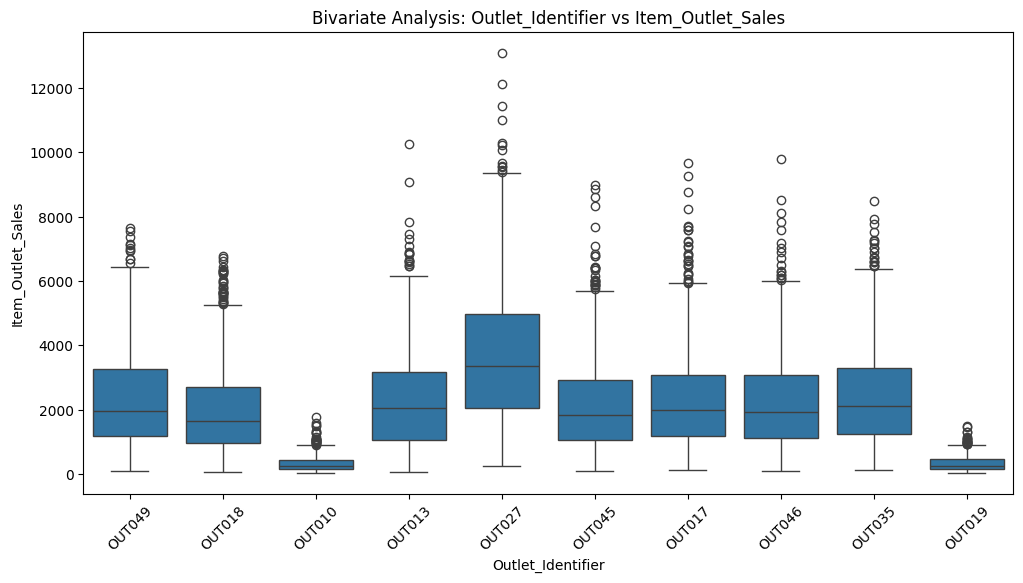

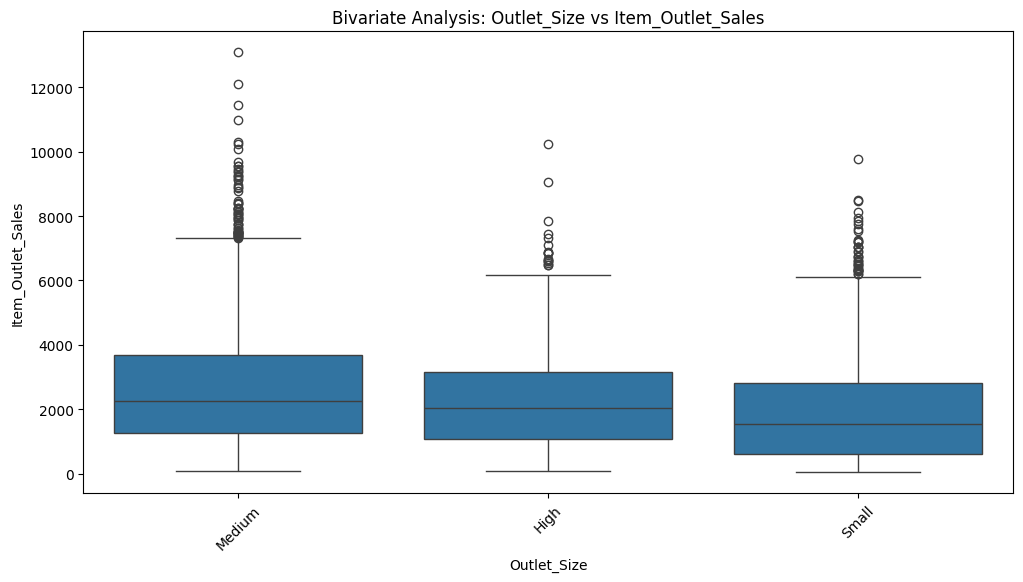

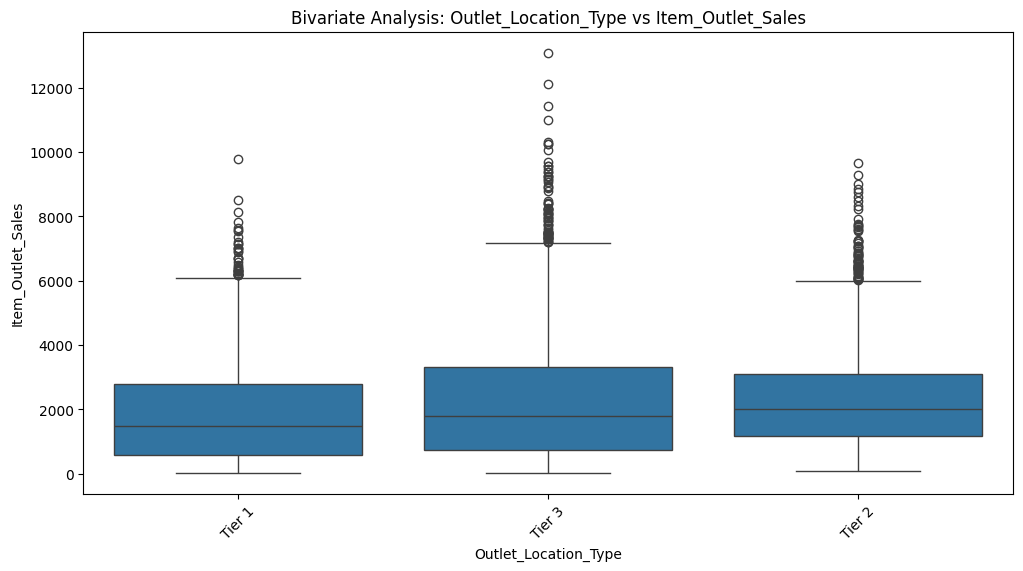

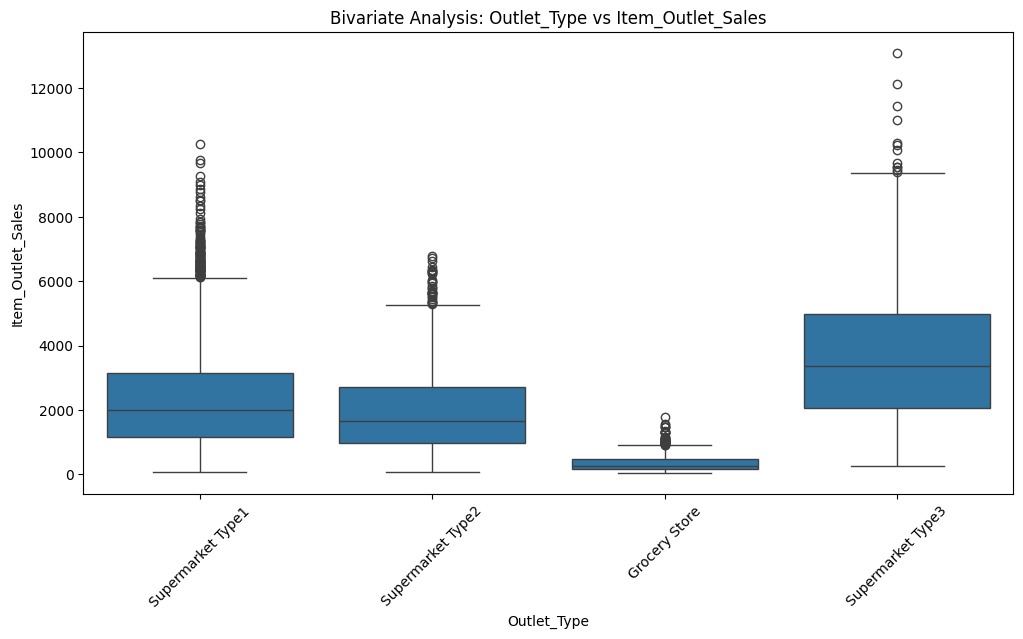

In [33]:
# Bivariate analysis for training data

import matplotlib.pyplot as plt
import seaborn as sns
# Bivariate analysis for numerical features
numerical_features = Train_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Item_Outlet_Sales', data=Train_df)
    plt.title(f'Bivariate Analysis: {feature} vs Item_Outlet_Sales')
    plt.show()
# Bivariate analysis for categorical features
categorical_features = Train_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Item_Outlet_Sales', data=Train_df)
    plt.title(f'Bivariate Analysis: {feature} vs Item_Outlet_Sales')
    plt.xticks(rotation=45)
    plt.show()


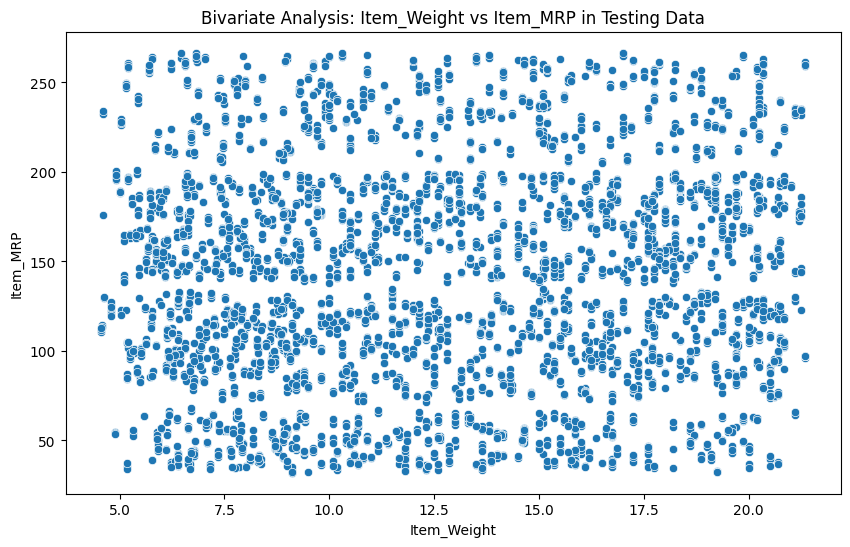

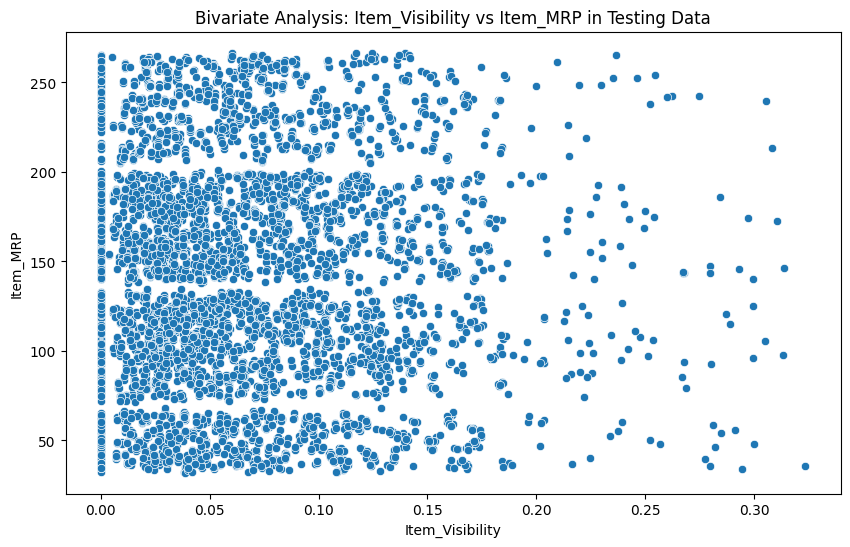

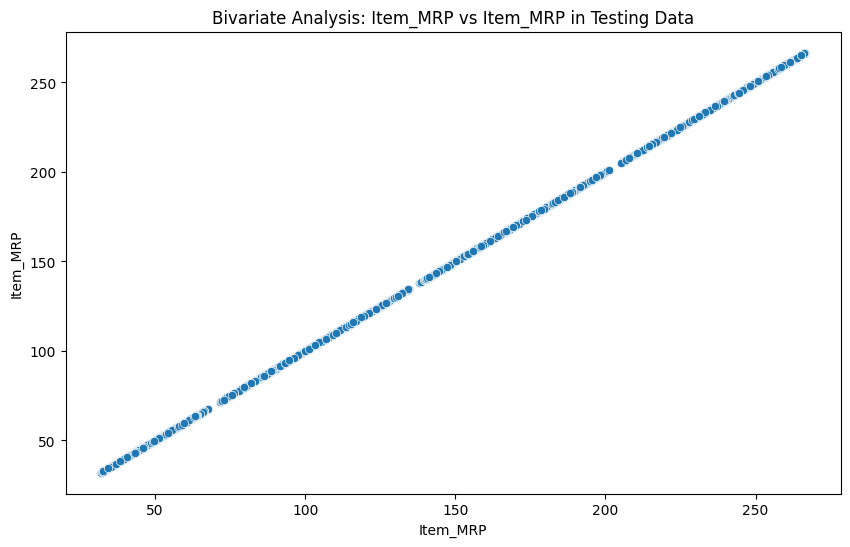

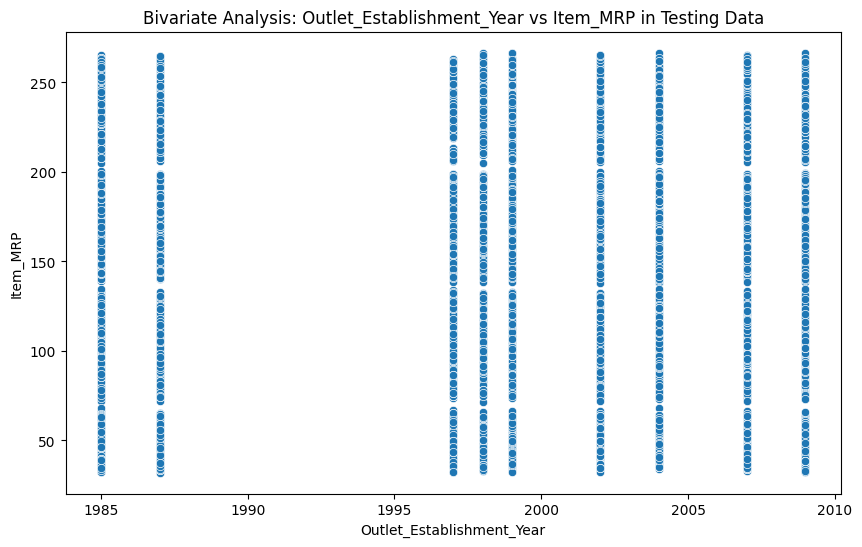

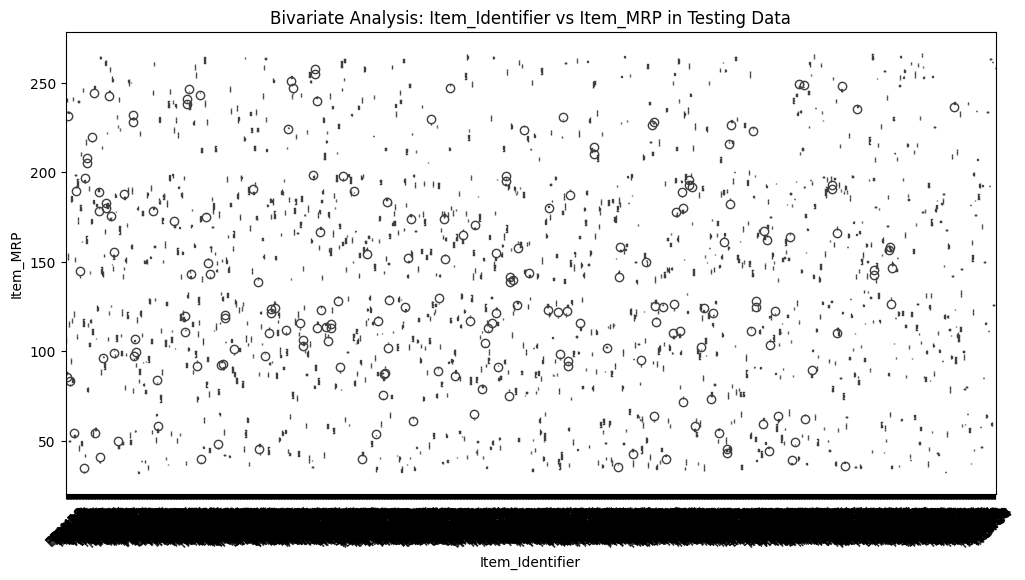

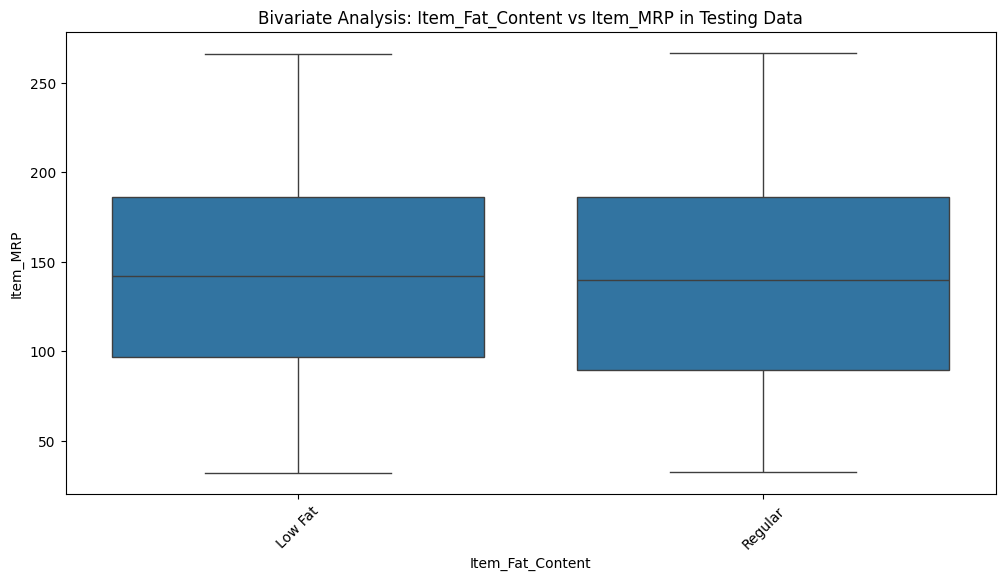

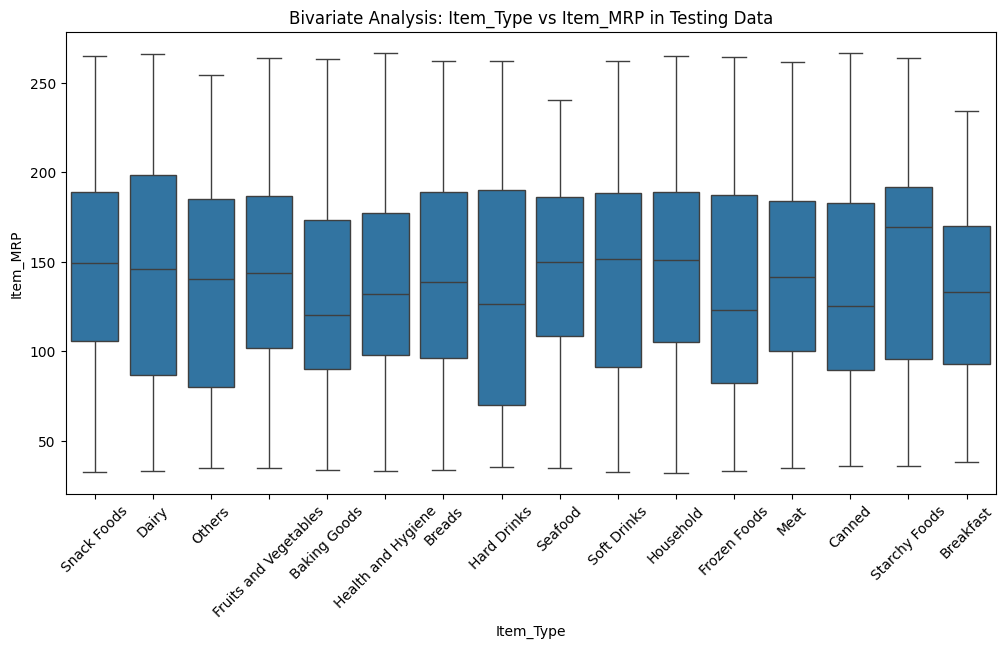

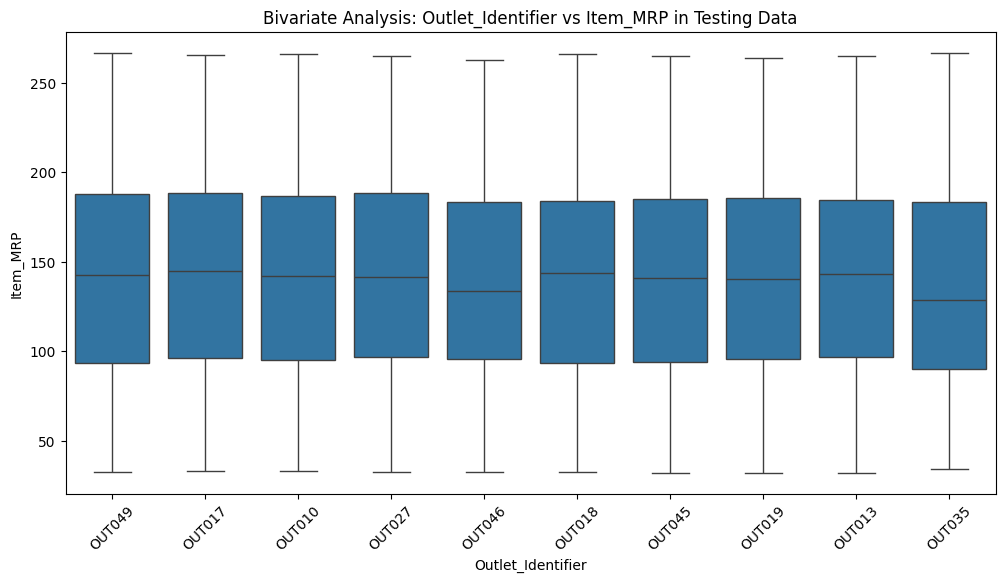

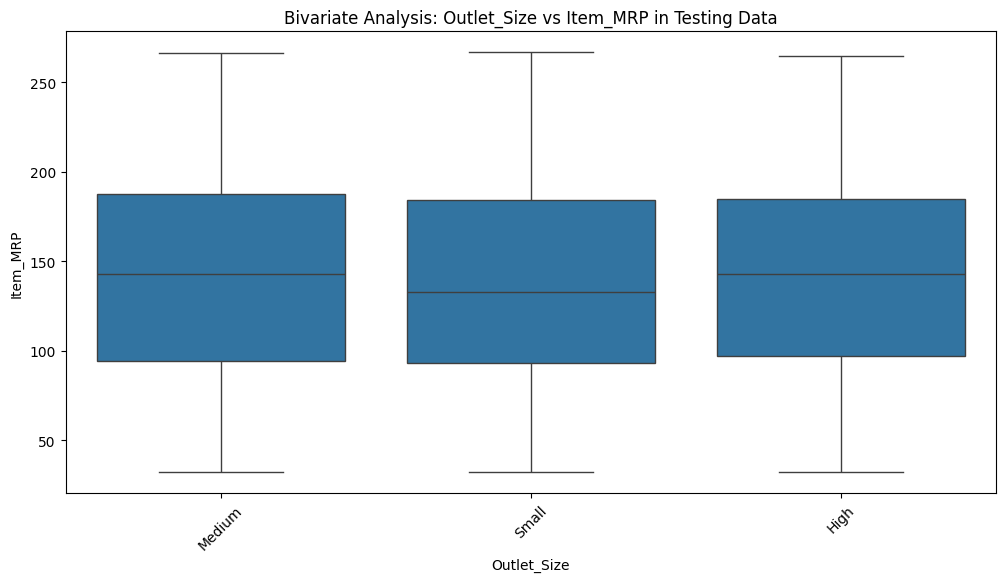

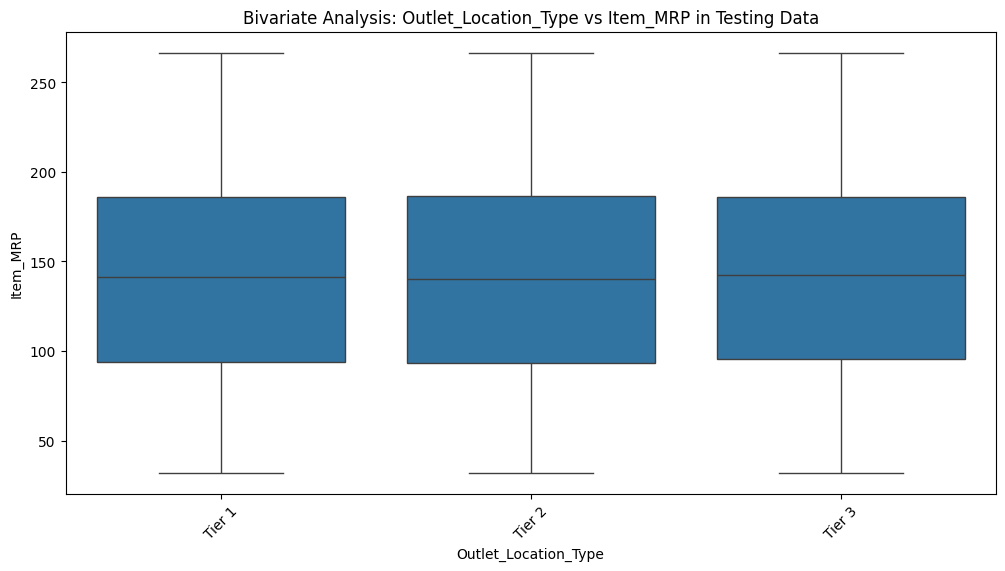

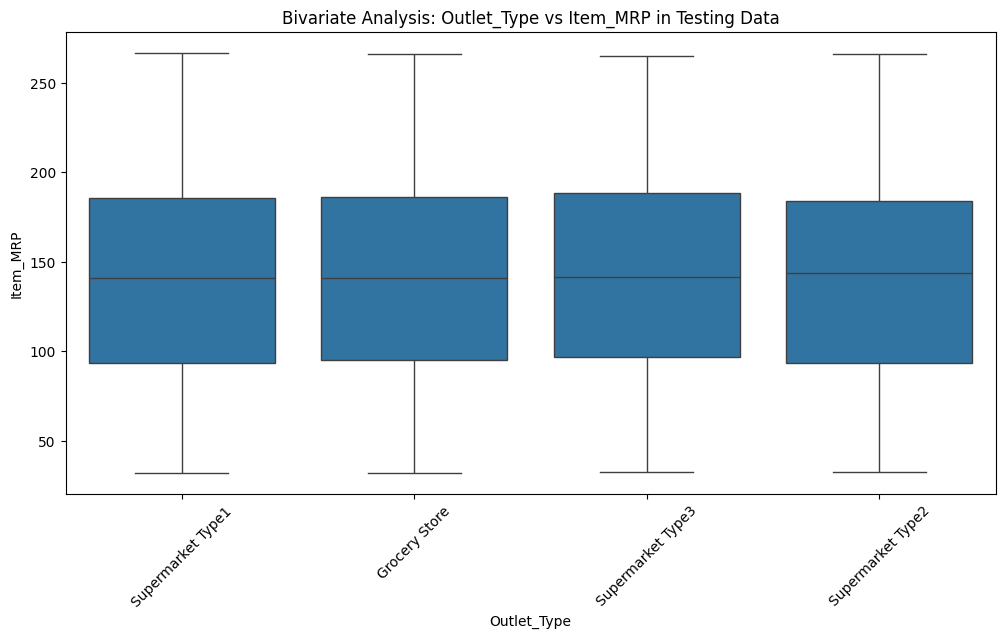

In [34]:
# Bivariate Analysis for testing data

# Bivariate analysis for numerical features
numerical_features = Test_df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='Item_MRP', data=Test_df)  # Adjust 'Item_MRP' based on your target variable
    plt.title(f'Bivariate Analysis: {feature} vs Item_MRP in Testing Data')
    plt.show()
# Bivariate analysis for categorical features
categorical_features = Test_df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y='Item_MRP', data=Test_df)  # Adjust 'Item_MRP' based on your target variable
    plt.title(f'Bivariate Analysis: {feature} vs Item_MRP in Testing Data')
    plt.xticks(rotation=45)
    plt.show()


## Handling Missing Values

In [37]:
# Missing value treatment for training data set

import pandas as pd
from sklearn.impute import SimpleImputer
print(Train_df.isnull().sum())

# Impute missing values for 'Item_Weight' using the mean
imputer_weight = SimpleImputer(strategy='mean')
Train_df['Item_Weight'] = imputer_weight.fit_transform(Train_df[['Item_Weight']])

# Impute missing values for 'Outlet_Size' using the most frequent category
imputer_size = SimpleImputer(strategy='most_frequent')
Train_df['Outlet_Size'] = imputer_size.fit_transform(Train_df[['Outlet_Size']])
print(Train_df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [38]:
# Missing value treatment for testing data set
print(Test_df.isnull().sum())

# Impute missing values for 'Item_Weight' using the mean
imputer_weight = SimpleImputer(strategy='mean')
Test_df['Item_Weight'] = imputer_weight.fit_transform(Test_df[['Item_Weight']])

# Impute missing values for 'Outlet_Size' using the most frequent category
imputer_size = SimpleImputer(strategy='most_frequent')
Test_df['Outlet_Size'] = imputer_size.fit_transform(Test_df[['Outlet_Size']])
print(Test_df.isnull().sum())



Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


## Feature Engineering


In [40]:
# Mapping dictionary for feature engineering in training data
print("Unique values in 'Item_Type' column before feature engineering:", Train_df['Item_Type'].unique())
item_type_mapping = {
    'Dairy': 'Perishable',
    'Soft Drinks': 'Non-Perishable',
    'Meat': 'Perishable',
    'Fruits and Vegetables': 'Perishable',
    'Household': 'Non-Perishable',
    'Baking Goods': 'Non-Perishable',
    'Snack Foods': 'Non-Perishable',
    'Frozen Foods': 'Perishable',
    'Breakfast': 'Non-Perishable',
    'Health and Hygiene': 'Non-Perishable',
    'Hard Drinks': 'Non-Perishable',
    'Canned': 'Non-Perishable',
    'Breads': 'Non-Perishable',
    'Starchy Foods': 'Non-Perishable',
    'Others': 'Non-Perishable',
    'Seafood': 'Perishable',
}

Unique values in 'Item_Type' column before feature engineering: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [41]:
# Apply feature engineering to create 'Item_Category' column in testing data
Train_df['Item_Category'] = Train_df['Item_Type'].map(item_type_mapping)
# Display unique values in the new feature 'Item_Category' in testing data
print("Unique values in 'Item_Category' in training data after feature engineering:", Train_df['Item_Category'].unique())


Unique values in 'Item_Category' in training data after feature engineering: ['Perishable' 'Non-Perishable']


In [42]:
# Feature engineering for testing dataset
# Display unique values in 'Item_Type' column before feature engineering
print("Unique values in 'Item_Type' column before feature engineering:", Test_df['Item_Type'].unique())

# Mapping dictionary for feature engineering in testing data
item_type_mapping = {
    'Dairy': 'Perishable',
    'Soft Drinks': 'Non-Perishable',
    'Meat': 'Perishable',
    'Fruits and Vegetables': 'Perishable',
    'Household': 'Non-Perishable',
    'Baking Goods': 'Non-Perishable',
    'Snack Foods': 'Non-Perishable',
    'Frozen Foods': 'Perishable',
    'Breakfast': 'Non-Perishable',
    'Health and Hygiene': 'Non-Perishable',
    'Hard Drinks': 'Non-Perishable',
    'Canned': 'Non-Perishable',
    'Breads': 'Non-Perishable',
    'Starchy Foods': 'Non-Perishable',
    'Others': 'Non-Perishable',
    'Seafood': 'Perishable',
}

# Create a new feature 'Item_Category' in testing data
Test_df['Item_Category'] = Test_df['Item_Type'].map(item_type_mapping)
# Display unique values in the new feature 'Item_Category' in testing data
print("Unique values in 'Item_Category' in testing data after feature engineering:", Test_df['Item_Category'].unique())

Unique values in 'Item_Type' column before feature engineering: ['Snack Foods' 'Dairy' 'Others' 'Fruits and Vegetables' 'Baking Goods'
 'Health and Hygiene' 'Breads' 'Hard Drinks' 'Seafood' 'Soft Drinks'
 'Household' 'Frozen Foods' 'Meat' 'Canned' 'Starchy Foods' 'Breakfast']
Unique values in 'Item_Category' in testing data after feature engineering: ['Non-Perishable' 'Perishable']


## Encoding  for Categorical Variables

In [43]:
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
from sklearn.preprocessing import LabelEncoder

def label_encode_data(data, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        if column in data.columns:
            data[column] = label_encoder.fit_transform(data[column])
    return data




In [44]:
# Apply label encoding to training dataset
Train_df_encoded = label_encode_data(Train_df, categorical_columns)
# Apply label encoding to testing dataset
Test_df_encoded = label_encode_data(Test_df, categorical_columns)

# Display the encoded datasets
print("Encoded Training Dataset:")
print(Train_df_encoded.head())

print("\nEncoded Testing Dataset:")
print(Test_df_encoded.head())

Encoded Training Dataset:
  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15         9.30                 0         0.016047          4   
1           DRC01         5.92                 1         0.019278         14   
2           FDN15        17.50                 0         0.016760         10   
3           FDX07        19.20                 1         0.000000          6   
4           NCD19         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outle

## Onehot encoding

In [45]:
# List of categorical columns in the dataset (excluding 'Item_Identifier')
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Train_df_encoded_onehot = pd.get_dummies(Train_df, columns=categorical_columns, drop_first=True)
Test_df_encoded_onehot = pd.get_dummies(Test_df, columns=categorical_columns, drop_first=True)

# Display the one-hot encoded datasets
print("One-Hot Encoded Training Dataset:")
print(Train_df_encoded_onehot)

print("\nOne-Hot Encoded Testing Dataset:")
print(Test_df_encoded_onehot)


One-Hot Encoded Training Dataset:
     Item_Identifier  Item_Weight  Item_Visibility  Item_MRP  \
0              FDA15        9.300         0.016047  249.8092   
1              DRC01        5.920         0.019278   48.2692   
2              FDN15       17.500         0.016760  141.6180   
3              FDX07       19.200         0.000000  182.0950   
4              NCD19        8.930         0.000000   53.8614   
...              ...          ...              ...       ...   
8518           FDF22        6.865         0.056783  214.5218   
8519           FDS36        8.380         0.046982  108.1570   
8520           NCJ29       10.600         0.035186   85.1224   
8521           FDN46        7.210         0.145221  103.1332   
8522           DRG01       14.800         0.044878   75.4670   

      Outlet_Establishment_Year  Item_Outlet_Sales   Item_Category  \
0                          1999          3735.1380      Perishable   
1                          2009           443.4228  Non-P

## Splitting the dataset into training and testing

In [46]:
# Separate features and target variable for training set
X_train = Train_df_encoded_onehot.drop(columns=['Item_Identifier', 'Item_Outlet_Sales'])
y_train = Train_df_encoded_onehot['Item_Outlet_Sales']

X_test = Test_df_encoded_onehot.drop(columns=['Item_Identifier'])
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (8523, 37)
y_train shape: (8523,)
X_test shape: (5681, 37)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Display the shapes of X_train, y_train, X_val, and y_val to ensure correctness
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (5454, 37)
y_train shape: (5454,)
X_val shape: (1364, 37)
y_val shape: (1364,)


In [49]:
X_train = pd.get_dummies(X_train, columns=['Item_Category'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Item_Category'], drop_first=True)



## Running The Models

Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

X_val = pd.get_dummies(X_val, columns=['Item_Category'], drop_first=True)
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error on Validation Set: {mse}')
print(f'Root Mean Squared Error on Validation Set: {rmse}')

y_test_pred = model.predict(X_test)


Mean Squared Error on Validation Set: 1374923.643669717
Root Mean Squared Error on Validation Set: 1172.5713810552077


Regularized Liner Regression

In [52]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_val_pred = ridge_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error on Validation Set: {mse}')
print(f'Root Mean Squared Error on Validation Set: {rmse}')

y_test_pred = ridge_model.predict(X_test)


Mean Squared Error on Validation Set: 1374735.314141972
Root Mean Squared Error on Validation Set: 1172.4910720947823


Lasso Regression

In [53]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_val_pred = lasso_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error on Validation Set: {mse}')
print(f'Root Mean Squared Error on Validation Set: {rmse}')
y_test_pred = lasso_model.predict(X_test)

Mean Squared Error on Validation Set: 1370343.3525025768
Root Mean Squared Error on Validation Set: 1170.6166548031754


RandomForest

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')
y_test_pred = rf_model.predict(X_test)

Mean Squared Error on Validation Set: 1430695.8856208583
Root Mean Squared Error on Validation Set: 1196.11700331567


## XGBoost

In [56]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_val_pred = xgb_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')
y_test_pred = xgb_model.predict(X_test)

Mean Squared Error on Validation Set: 1513767.4849380988
Root Mean Squared Error on Validation Set: 1230.352585618488


## Hyper Parameter Tuning XGB And GBR

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Hyperparameter grid for XGBoost
xgb_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
#  RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=xgb_param_dist,
    scoring='neg_mean_squared_error',
    n_iter=10,  # You can adjust the number of iterations
    cv=3,
    random_state=42
)
xgb_random_search.fit(X_train, y_train)

# Display the best hyperparameters for XGBoost $ GBR
print("Best hyperparameters for XGBoost & GBR:")
print(xgb_random_search.best_params_)



Best hyperparameters for XGBoost & GBR:
{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


## Standard Scaling 06m Robust Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_val_scaled)
print(X_test_scaled)

[[ 1.47314292  0.50315283  0.66199305 ... -0.34629159 -0.36008376
  -0.78363704]
 [-1.03180041 -0.76248642  0.16138565 ... -0.34629159 -0.36008376
  -0.78363704]
 [-0.13683956  0.07260979 -0.54596067 ... -0.34629159 -0.36008376
  -0.78363704]
 ...
 [-0.77609731 -0.5967236   1.64669351 ... -0.34629159 -0.36008376
  -0.78363704]
 [ 0.76285653  3.92629568 -1.71011689 ... -0.34629159 -0.36008376
   1.27610099]
 [-1.59292666 -0.3876943  -0.70091936 ... -0.34629159 -0.36008376
  -0.78363704]]
[[-1.0187785  -0.82469497 -0.55183136 ... -0.34629159 -0.36008376
  -0.78363704]
 [ 0.54977062 -1.05262013 -1.46380456 ... -0.34629159 -0.36008376
  -0.78363704]
 [-0.29073495 -0.65768691 -1.64815845 ... -0.34629159 -0.36008376
  -0.78363704]
 ...
 [ 1.73358127 -0.03253181  1.83362486 ... -0.34629159 -0.36008376
  -0.78363704]
 [-1.64264671 -0.7173628   0.74215417 ... -0.34629159 -0.36008376
  -0.78363704]
 [-0.32624927 -0.46617391  0.85813005 ... -0.34629159 -0.36008376
   1.27610099]]
[[ 1.86380044 -1

In [65]:
# Robust scaling
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)
X_val_robust_scaled = robust_scaler.transform(X_val)
X_test_robust_scaled = robust_scaler.transform(X_test)

In [66]:
print(X_train_robust_scaled)
print(X_val_robust_scaled)
print(X_test_robust_scaled)

[[ 0.94509535  0.5521771   0.4191023  ...  0.          0.
   0.        ]
 [-0.65672145 -0.397967    0.08142193 ...  0.          0.
   0.        ]
 [-0.08442773  0.22895867 -0.39571239 ...  0.          0.
   0.        ]
 ...
 [-0.49320896 -0.27352509  1.08332345 ...  0.          0.
   0.        ]
 [ 0.49089399  3.12200808 -1.18098387 ...  0.          0.
   1.        ]
 [-1.01554053 -0.11660205 -0.50023844 ...  0.          0.
   0.        ]]
[[-0.64839443 -0.44466836 -0.39967242 ...  0.          0.
   0.        ]
 [ 0.35463358 -0.61577695 -1.01483602 ...  0.          0.
   0.        ]
 [-0.18283803 -0.31929163 -1.13919034 ...  0.          0.
   0.        ]
 ...
 [ 1.11163585  0.15002649  1.20941637 ...  0.          0.
   0.        ]
 [-1.04733462 -0.36409167  0.47317429 ...  0.          0.
   0.        ]
 [-0.2055481  -0.17551848  0.55140482 ...  0.          0.
   1.        ]]
[[ 1.1949061  -0.68345473 -0.39172422 ...  0.          0.
   0.        ]
 [-0.69002955 -0.23136493 -0.61410919 .

## Final prediction on Test data set

In [67]:
from xgboost import XGBRegressor
# Instantiate the model with the best hyperparameters
final_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1, colsample_bytree=0.9, subsample=1.0, random_state=42)
# Train the final model on the full training dataset
final_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
# Make predictions on the test dataset
test_predictions = final_model.predict(X_test)
print(test_predictions)

[1558.966  1360.1191 1092.4652 ... 1811.186  3791.3801 1312.554 ]
